<a href="https://colab.research.google.com/github/FelixEbenezer/Projet803_Mxnet/blob/main/Mxnet_ANN_CNN_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet

     |████████████████████████████████| 47.3 MB 100 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd, gluon


In [3]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

In [4]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(shape=(num_examples, num_inputs))
noise = 0.01 * nd.random_normal(shape=(num_examples,))
y = real_fn(X) + noise

In [5]:
X


[[ 2.2122064   0.7740038 ]
 [ 1.0434403   1.1839255 ]
 [ 1.8917114  -1.2347414 ]
 ...
 [ 0.08873925 -0.45150322]
 [-0.13049959  0.15614532]
 [-0.22753173 -0.19928493]]
<NDArray 10000x2 @cpu(0)>

In [6]:
y


[ 5.9988875  2.2722754 12.182208  ...  5.9032497  3.4229667  4.4221096]
<NDArray 10000 @cpu(0)>

In [7]:
batch_size = 4
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y),
                                      batch_size=batch_size, shuffle=True)

In [8]:
train_data

In [17]:
net = gluon.nn.Dense(1, in_units=2)

In [18]:
net.collect_params()

dense0_ (
  Parameter dense0_weight (shape=(1, 2), dtype=float32)
  Parameter dense0_bias (shape=(1,), dtype=float32)
)

In [19]:
type(net.collect_params())

mxnet.gluon.parameter.ParameterDict

In [20]:
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)

In [21]:
example_data = nd.array([[4,7]])
net(example_data)


[[-4.222597]]
<NDArray 1x1 @cpu(0)>

In [22]:
net = gluon.nn.Dense(1)
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)

In [23]:
square_loss = gluon.loss.L2Loss()

In [24]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.0001})

In [25]:
epochs = 10
loss_sequence = []
num_batches = num_examples / batch_size

for e in range(epochs):
    cumulative_loss = 0
    # inner loop
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.mean(loss).asscalar()
    print("Epoch %s, loss: %s" % (e, cumulative_loss / num_examples))
    loss_sequence.append(cumulative_loss)

Epoch 0, loss: 3.7838128358393908
Epoch 1, loss: 2.2957517302796244
Epoch 2, loss: 1.3929277834489942
Epoch 3, loss: 0.8451653525177389
Epoch 4, loss: 0.5128213820062578
Epoch 5, loss: 0.31117127547347917
Epoch 6, loss: 0.1888197086520493
Epoch 7, loss: 0.11458091682041996
Epoch 8, loss: 0.06953355386573822
Epoch 9, loss: 0.04219938648371026


# MXNET avec CNN

In [27]:
from __future__ import print_function
import numpy as np
import mxnet as mx

from mxnet import nd, autograd, gluon
ctx = mx.cpu()
#ctx = mx.gpu()

In [ ]:
#Transformation et chargement des données

Ensuite, nous utilisons gluon.data.DataLoader, l'itérateur de données de Gluon, pour stocker les données d'entraînement et de test. Les itérateurs sont une classe d'objets utile pour parcourir de grands ensembles de données. Nous passons à DataLoader de Gluon un assistant, gluon.data.vision.MNISTqui prétraitera l'ensemble de données d'écriture manuscrite MNIST, en entrant dans la bonne taille et le bon format, en utilisant des paramètres pour lui dire quel est l'ensemble de test et quel est l'ensemble d'apprentissage.

données_train  =  mx . gluon . données . DataLoader ( mx . gluon . data .

In [28]:
batch_size = 64
num_inputs = 784
num_outputs = 10
def transform(data, label):
    return nd.transpose(data.astype(np.float32), (2,0,1))/255, label.astype(np.float32)
train_data = gluon.data.DataLoader(gluon.data.vision.MNIST(train=True, transform=transform),
                                      batch_size, shuffle=True)
test_data = gluon.data.DataLoader(gluon.data.vision.MNIST(train=False, transform=transform),
                                     batch_size, shuffle=False)

In [29]:
train_data

Ensuite, nous utilisons gluon.data.DataLoader, l'itérateur de données de Gluon, pour stocker les données d'entraînement et de test. Les itérateurs sont une classe d'objets utile pour parcourir de grands ensembles de données. Nous passons à DataLoader de Gluon un assistant, gluon.data.vision.MNISTqui prétraitera l'ensemble de données d'écriture manuscrite MNIST, en entrant dans la bonne taille et le bon format, en utilisant des paramètres pour lui dire quel est l'ensemble de test et quel est l'ensemble d'apprentissage.

données_train  =  mx . gluon . données . DataLoader ( mx . gluon . data .

In [37]:
num_fc = 512
# La première étape consiste à initialiser votre modèle 
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Conv2D(channels=20, kernel_size=5, activation='relu')) # 1ère couche - 20 nœuds 
    net.add(gluon.nn.MaxPool2D(pool_size=2, strides=2))
    net.add(gluon.nn.Conv2D(channels=50, kernel_size=5, activation='relu')) # 2ème couche - 50 nœuds 
    net.add(gluon.nn.MaxPool2D(pool_size=2, strides=2))
    # The Flatten layer collapses all axis, except the first one, into one axis.
    net.add(gluon.nn.Flatten())
    net.add(gluon.nn.Dense(num_fc, activation="relu"))
    net.add(gluon.nn.Dense(num_outputs))

Avant de lancer le processus de formation du modèle, nous devons initialiser les paramètres du modèle et configurer la perte avec gluon.loss.SoftmaxCrossEntropyLoss()et les fonctions d'optimisation du modèle avec gluon.Trainer. Comme pour la création du modèle, ces fonctions normalement compliquées sont réduites à une ligne de code chacune.

In [38]:
#Initialisation de parametres, # Nous commençons avec des valeurs aléatoires pour tous les paramètres du modèle à partir d'une 
# distribution Xavier(ou normal) avec un écart type de magnitude 2.24             net . collect_params (). initialiser ( mx . init . Normal ( sigma = 0.05 ))
net.collect_params().initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)

In [39]:
#Optimizer pour l entrainement de notre modele, # Nous choisissons d'utiliser l'algorithme d'entraînement de descente de gradient stochastique (sgd) 
# et définissons l'hyperparamètre du taux d'apprentissage sur .1 
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': .001})

In [40]:
#La fonction de coût, # Nous choisissons d'utiliser la fonction de perte d'entropie croisée softmax pour mesurer la capacité du # modèle à prédire la bonne réponse 

softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

In [41]:
#La fonction d élvaluation
def evaluate_accuracy(data_iterator, net):
    acc = mx.metric.Accuracy()
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        acc.update(preds=predictions, labels=label)
    return acc.get()[1]

L'exécution de la formation est assez typique et tout en utilisant les fonctionnalités de Gluon pour rendre le processus simple et transparent. Il y a quatre étapes : (1) transmettre un lot de données ; (2) calculer la différence entre la sortie générée par le modèle de réseau neuronal et la vérité réelle (c'est-à-dire la perte) ; (3) utiliser Gluon's autogradpour calculer les dérivées des paramètres du modèle par rapport à leur impact sur la perte ; et (4) utiliser la méthode de Gluon trainerpour optimiser les paramètres de manière à diminuer la perte. Nous avons fixé le nombre d'époques à 5, ce qui signifie que nous parcourrons l'ensemble des données d'apprentissage 5 fois.

In [43]:
#Entrainement avec Autograd
epochs = 5
smoothing_constant = .01

for e in range(epochs):
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        with autograd.record(): # Commencer à enregistrer les dérivées 
            output = net(data) # the forward iteration
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        trainer.step(data.shape[0])

         # Fournir des statistiques sur l'amélioration du modèle à chaque époque 
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (curr_loss if ((i == 0) and (e == 0))
                       else (1 - smoothing_constant) * moving_loss + smoothing_constant * curr_loss)

    test_accuracy = evaluate_accuracy(test_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" % (e, moving_loss, train_accuracy, test_accuracy))

Epoch 0. Loss: 1.7798678159034715, Train_acc 0.7025166666666667, Test_acc 0.7087
Epoch 1. Loss: 0.7198127428921813, Train_acc 0.8389, Test_acc 0.8479
Epoch 2. Loss: 0.45127515751387776, Train_acc 0.8775, Test_acc 0.8837
Epoch 3. Loss: 0.37970732611709695, Train_acc 0.8943, Test_acc 0.8981
Epoch 4. Loss: 0.3341752089323287, Train_acc 0.9045833333333333, Test_acc 0.9087


Nous avons maintenant un modèle de réseau neuronal formé et pouvons voir comment la précision s'améliore à chaque époque.

# RNN pour le trading financier en utilisant MXNET - Prédiction du prix des actions 

In [1]:
import mxnet as mx 
from mxnet import gluon , nd , autograd
from mxnet.gluon import nn


In [2]:
import pandas as pd
import numpy as np

In [3]:
import datetime

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data=pd.read_csv("/content/drive/MyDrive/all_stocks_5yr.csv", sep=',', header=0, index_col=None)
data.shape

(619040, 7)

In [13]:
data = data.iloc[0:10000,]

In [14]:
data

,date,open,high,low,close,volume,Name,avg_price
0,2013-02-08,15.07,15.12,14.630,14.75,8407500,AAL,14.89250
1,2013-02-11,14.89,15.01,14.260,14.46,8882000,AAL,14.65500
2,2013-02-12,14.45,14.51,14.100,14.27,8126000,AAL,14.33250
3,2013-02-13,14.30,14.94,14.250,14.66,10259500,AAL,14.53750
4,2013-02-14,14.94,14.96,13.160,13.99,31879900,AAL,14.26250
...,...,...,...,...,...,...,...,...
9995,2017-10-18,150.33,153.43,149.030,153.00,4290947,ADBE,151.44750
9996,2017-10-19,165.50,172.15,164.420,171.73,13522642,ADBE,168.45000
9997,2017-10-20,171.50,175.87,171.355,175.64,6019412,ADBE,173.59125
9998,2017-10-23,175.68,175.85,171.830,172.16,3220814,ADBE,173.88000


In [15]:
data["avg_price"] = np.mean(data[["open" , "high" , "low" , "close"]]  , axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
datetime.datetime.strptime("1980-12-12" , "%Y-%m-%d").year

1980

In [17]:
datetime.datetime.strptime("1980-12-12" , "%Y-%m-%d").month

12

In [18]:
datetime.datetime.strptime("1980-12-12" , "%Y-%m-%d").day

12

In [19]:
def dayyear(x):
    
    
    #year = datetime.datetime.strptime(str(x) , "%Y-%m-%d").year
    #strval = datetime.datetime.strptime(x ,"%Y-%m-%d")
    year = datetime.datetime.strptime(x , "%Y-%m-%d").year
    month = datetime.datetime.strptime(x , "%Y-%m-%d").month
    day = datetime.datetime.strptime(x , "%Y-%m-%d").day
    
    return [year , month , day]

In [20]:
test=  data['date'].apply(dayyear)

In [21]:
df2 = pd.DataFrame(test.tolist(), columns=['Year', 'Month' , "day"])
df2

,Year,Month,day
0,2013,2,8
1,2013,2,11
2,2013,2,12
3,2013,2,13
4,2013,2,14
...,...,...,...
9995,2017,10,18
9996,2017,10,19
9997,2017,10,20
9998,2017,10,23


In [22]:
df = pd.concat([data , df2] , axis=1)
df

,date,open,high,low,close,volume,Name,avg_price,Year,Month,day
0,2013-02-08,15.07,15.12,14.630,14.75,8407500,AAL,14.89250,2013,2,8
1,2013-02-11,14.89,15.01,14.260,14.46,8882000,AAL,14.65500,2013,2,11
2,2013-02-12,14.45,14.51,14.100,14.27,8126000,AAL,14.33250,2013,2,12
3,2013-02-13,14.30,14.94,14.250,14.66,10259500,AAL,14.53750,2013,2,13
4,2013-02-14,14.94,14.96,13.160,13.99,31879900,AAL,14.26250,2013,2,14
...,...,...,...,...,...,...,...,...,...,...,...
9995,2017-10-18,150.33,153.43,149.030,153.00,4290947,ADBE,151.44750,2017,10,18
9996,2017-10-19,165.50,172.15,164.420,171.73,13522642,ADBE,168.45000,2017,10,19
9997,2017-10-20,171.50,175.87,171.355,175.64,6019412,ADBE,173.59125,2017,10,20
9998,2017-10-23,175.68,175.85,171.830,172.16,3220814,ADBE,173.88000,2017,10,23


In [23]:
features = df.drop(["date" , "avg_price"] , axis=1)

In [24]:
target = df.avg_price

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_train  = df.iloc[0 : 1000 , :]

In [27]:
df_train.head()

,date,open,high,low,close,volume,Name,avg_price,Year,Month,day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,14.8925,2013,2,8
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,14.6550,2013,2,11
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,14.3325,2013,2,12
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,14.5375,2013,2,13
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,14.2625,2013,2,14


In [28]:
df_test = df.iloc[1000 : len(df) , :]

In [29]:
df_test2 = df_test.drop(["date"  , "avg_price" , "Year" , "Month" , "day" , "volume"] , axis=1)

In [30]:
df_train2 = df_train.drop(["date"  , "avg_price", "Year" , "Month" , "day" , "volume"] , axis=1)

In [31]:
df_train2.head()

,open,high,low,close,Name
0,15.07,15.12,14.63,14.75,AAL
1,14.89,15.01,14.26,14.46,AAL
2,14.45,14.51,14.10,14.27,AAL
3,14.30,14.94,14.25,14.66,AAL
4,14.94,14.96,13.16,13.99,AAL


In [32]:
df_test2.head()

,open,high,low,close,Name
1000,45.62,45.92,43.8600,44.90,AAL
1001,44.79,44.84,43.7420,44.25,AAL
1002,44.75,45.00,43.9100,44.05,AAL
1003,43.61,44.52,43.5700,44.01,AAL
1004,44.31,44.55,43.7627,44.20,AAL


In [33]:
target = df_train.avg_price

In [34]:
target_test = df_test.avg_price

In [35]:
df_open = df_train2.open

In [36]:
df_open_test = df_test2.open

In [37]:
df_open_test

1000     45.62
1001     44.79
1002     44.75
1003     43.61
1004     44.31
         ...  
9995    150.33
9996    165.50
9997    171.50
9998    175.68
9999    171.47
Name: open, Length: 9000, dtype: float64

# Redimensionnement des données pour le modèle RNN - Sample , Timestep , Features

In [38]:
lot_size = 60

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.array(df_open).reshape(-1,1))


training_set_scaled = np.array(training_set_scaled)
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(lot_size, len(df_open)):
    X_train.append(training_set_scaled[i-lot_size:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [40]:
X_train.shape

(940, 60, 1)

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(np.array(df_open_test).reshape(-1,1))


test_set_scaled = np.array(test_set_scaled)
# Creating a data structure with 60 timesteps and 1 output
X_test = []
y_test = []
for i in range(lot_size, len(test_set_scaled)):
    X_test.append(test_set_scaled[i-lot_size:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [42]:
X_train.shape

(940, 60, 1)

In [43]:
y_train.shape

(940,)

# Les couhes récurrentes et le modèle 

In [44]:
context = mx.cpu()

In [45]:
model = mx.gluon.nn.Sequential()
with model.name_scope():
    #model.add(mx.gluon.rnn.LSTM(10 , num_layers =2 , input_size =1 ))
    model.add(mx.gluon.rnn.LSTM(1 , bidirectional = True  ))
    model.add(mx.gluon.nn.Dense(164,activation='relu' ))
    model.add(mx.gluon.nn.Dense(64,activation='relu'))
    model.add(mx.gluon.nn.Dense(32,activation='relu'))
    model.add(mx.gluon.nn.Dense(1 ))

In [46]:
#initialization du modele
model.collect_params().initialize(mx.init.Xavier() , ctx= context)

In [47]:
#Modele optimizer
trainer = gluon.Trainer(model.collect_params(), 'adagrad',
                            {'learning_rate': 0.05})

In [48]:
#Loss fonction
L = gluon.loss.L2Loss()

In [49]:
#Fonction pour évaluer l´accuracy
def evaluate_accuracy(data_iterator , model , L):
    
    loss_avg = 0.
    for i , (data,label) in enumerate(data_iterator):
        
        data = data.as_in_context(context).reshape((-1 ,lot_size , 1))
        label = label.as_in_context(context).reshape((-1, 1, 1))
        output = model(data)
        
        loss = L(output , label)
        loss_avg = (loss_avg*i+nd.mean(loss).asscalar())/(i+1)
        
    return loss_avg

In [50]:
#Data iterator
batch_size1 = len(X_train)
batch_size_test = len(X_test)

training_data_batch = mx.gluon.data.DataLoader(gluon.data.ArrayDataset(nd.array(X_train) , nd.array(y_train)) ,
                                               batch_size=batch_size1 , shuffle= False)
validation_data_batches = mx.gluon.data.DataLoader(gluon.data.ArrayDataset(nd.array(X_test) , nd.array(y_test)) ,
                                                batch_size=batch_size_test , shuffle= False)

# Entrainement du modèle

In [51]:
#feature_count =9
epochs = 5
training_mse = []
validation_mse = []

for epoch in range(epochs):
    print(str(epoch+1))
    for i, (data,label) in enumerate(training_data_batch):
        data = data.as_in_context(context).reshape((-1, lot_size, 1))
        label = label.as_in_context(context).reshape((-1, 1, 1))

        with autograd.record():
            output = model(data)
            loss = L(output, label)

        loss.backward()
        trainer.step(batch_size1)

    training_mse.append(evaluate_accuracy(training_data_batch, model, L))
    validation_mse.append(evaluate_accuracy(validation_data_batches, model, L))

1
2
3
4
5


In [52]:
#Training score
training_mse

[135.76841735839844,
 0.20240363478660583,
 0.038202494382858276,
 0.29513049125671387,
 0.12455137073993683]

In [53]:
#Validation score
validation_mse

[86.55198669433594,
 0.08464378863573074,
 0.013669498264789581,
 0.28891831636428833,
 0.04576937109231949]

In [54]:
#Output shape
output.shape

(940, 1)

In [55]:
output.asnumpy()

array([[0.48151147],
       [0.5055393 ],
       [0.52557516],
       [0.5389389 ],
       [0.54757273],
       [0.5542246 ],
       [0.55889875],
       [0.5634166 ],
       [0.56831014],
       [0.5732982 ],
       [0.577023  ],
       [0.5795158 ],
       [0.58143145],
       [0.584     ],
       [0.5883881 ],
       [0.5925353 ],
       [0.5964614 ],
       [0.5999316 ],
       [0.6022903 ],
       [0.6039082 ],
       [0.606839  ],
       [0.60969794],
       [0.6107764 ],
       [0.6119602 ],
       [0.6143478 ],
       [0.61708987],
       [0.61904085],
       [0.61768645],
       [0.616632  ],
       [0.617328  ],
       [0.6177911 ],
       [0.6192624 ],
       [0.62077475],
       [0.6217802 ],
       [0.62132895],
       [0.62123376],
       [0.6234038 ],
       [0.62681675],
       [0.62922794],
       [0.6300263 ],
       [0.63135827],
       [0.6326609 ],
       [0.6349379 ],
       [0.6371445 ],
       [0.6387932 ],
       [0.6411239 ],
       [0.6421936 ],
       [0.642

In [56]:
y_train

array([0.09380117, 0.09052632, 0.10269006, 0.1045614 , 0.10760234,
       0.10947368, 0.12233918, 0.13614035, 0.14596491, 0.13824561,
       0.12654971, 0.11508772, 0.10152047, 0.11625731, 0.12397661,
       0.11508772, 0.11181287, 0.10573099, 0.10292398, 0.10853801,
       0.09380117, 0.08842105, 0.0877193 , 0.09239766, 0.08888889,
       0.08959064, 0.08678363, 0.08935673, 0.09076023, 0.08888889,
       0.09403509, 0.08397661, 0.08561404, 0.06830409, 0.07204678,
       0.07859649, 0.07368421, 0.07251462, 0.07859649, 0.0851462 ,
       0.06830409, 0.08865497, 0.08888889, 0.09052632, 0.09777778,
       0.09964912, 0.09871345, 0.10573099, 0.11040936, 0.11274854,
       0.13005848, 0.11976608, 0.11953216, 0.12140351, 0.12374269,
       0.1251462 , 0.13099415, 0.13871345, 0.14479532, 0.14292398,
       0.14736842, 0.14596491, 0.13473684, 0.14105263, 0.13333333,
       0.13684211, 0.13497076, 0.1251462 , 0.13380117, 0.06807018,
       0.06619883, 0.05988304, 0.06619883, 0.05847953, 0.06222

In [57]:
sc.inverse_transform(output.asnumpy())

array([[114.01467 ],
       [118.05687 ],
       [121.427505],
       [123.67568 ],
       [125.12816 ],
       [126.2472  ],
       [127.03353 ],
       [127.79357 ],
       [128.6168  ],
       [129.45596 ],
       [130.08258 ],
       [130.50194 ],
       [130.8242  ],
       [131.25632 ],
       [131.99452 ],
       [132.69221 ],
       [133.3527  ],
       [133.9365  ],
       [134.33328 ],
       [134.60547 ],
       [135.09853 ],
       [135.57948 ],
       [135.76091 ],
       [135.96005 ],
       [136.36172 ],
       [136.82303 ],
       [137.15125 ],
       [136.92339 ],
       [136.746   ],
       [136.86308 ],
       [136.941   ],
       [137.1885  ],
       [137.44293 ],
       [137.61208 ],
       [137.53616 ],
       [137.52016 ],
       [137.88522 ],
       [138.45938 ],
       [138.865   ],
       [138.99931 ],
       [139.2234  ],
       [139.44255 ],
       [139.82559 ],
       [140.19682 ],
       [140.47417 ],
       [140.86627 ],
       [141.04623 ],
       [141.0

In [58]:
sc.inverse_transform(y_train.reshape(-1,1))

array([[ 48.79017076],
       [ 48.23924211],
       [ 50.28554854],
       [ 50.60036491],
       [ 51.11194152],
       [ 51.42675789],
       [ 53.59112047],
       [ 55.91289123],
       [ 57.56567719],
       [ 56.26705965],
       [ 54.29945731],
       [ 52.37120702],
       [ 50.0887883 ],
       [ 52.56796725],
       [ 53.8665848 ],
       [ 52.37120702],
       [ 51.82027836],
       [ 50.79712515],
       [ 50.32490058],
       [ 51.26934971],
       [ 48.79017076],
       [ 47.88507368],
       [ 47.76701754],
       [ 48.55405848],
       [ 47.96377778],
       [ 48.08183392],
       [ 47.60960936],
       [ 48.04248187],
       [ 48.27859415],
       [ 47.96377778],
       [ 48.82952281],
       [ 47.1373848 ],
       [ 47.41284912],
       [ 44.50079766],
       [ 45.13043041],
       [ 46.23228772],
       [ 45.40589474],
       [ 45.2091345 ],
       [ 46.23228772],
       [ 47.33414503],
       [ 44.50079766],
       [ 47.92442573],
       [ 47.96377778],
       [ 48

# Visualisation du résultat - Comparaison avec les données réelles

In [59]:
import matplotlib.pyplot as plt

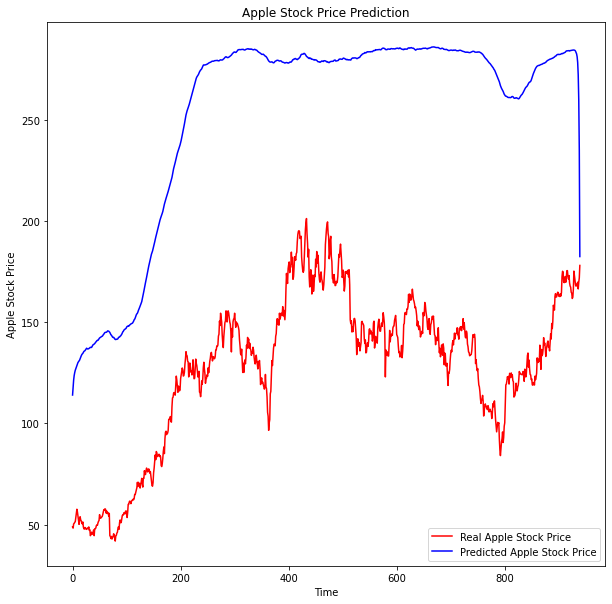

In [60]:
%matplotlib inline
plt.figure(figsize = (10 ,10))
plt.plot(sc.inverse_transform(y_train.reshape(-1,1)), color = 'red', label = 'Real Apple Stock Price')
plt.plot(abs(sc.inverse_transform(output.asnumpy())), color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# PREDICTIONS

In [61]:
output_test = model(nd.array(X_test))

In [62]:
sc.inverse_transform(output_test.asnumpy())

array([[48.02835 ],
       [52.95832 ],
       [57.034985],
       ...,
       [52.10427 ],
       [50.326584],
       [46.618202]], dtype=float32)

In [63]:
sc.inverse_transform(y_test.reshape(-1,1))

array([[ 46.51],
       [ 43.91],
       [ 44.02],
       ...,
       [171.5 ],
       [175.68],
       [171.47]])

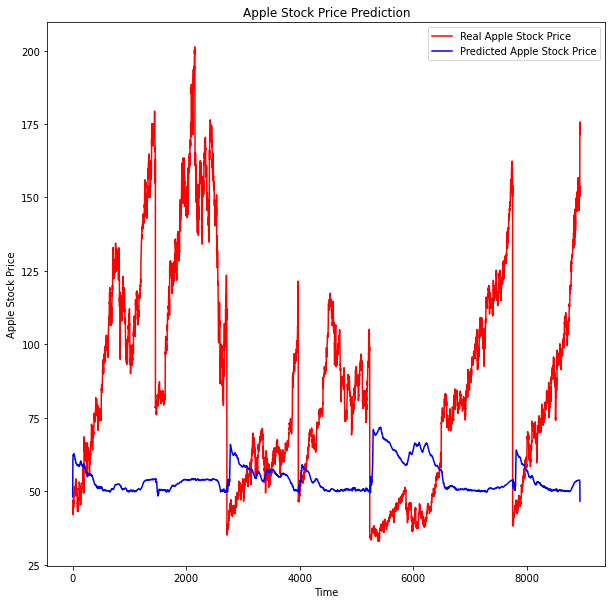

In [64]:
%matplotlib inline
plt.figure(figsize = (10 ,10))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)), color = 'red', label = 'Real Apple Stock Price')
plt.plot(sc.inverse_transform(output_test.asnumpy()), color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# MXNET TRANSFER LEARNING

In [1]:
!pip install gluoncv

     |████████████████████████████████| 1.3 MB 7.5 MB/s 


In [2]:
import zipfile, os
from gluoncv.utils import download

file_url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/minc-2500-tiny.zip'
zip_file = download(file_url, path='./')
with zipfile.ZipFile(zip_file, 'r') as zin:
    zin.extractall(os.path.expanduser('./'))

8038KB [00:00, 51262.28KB/s]                          


# LES HYPER PARAMETRES

In [5]:
!pip install mxnet

     |████████████████████████████████| 47.3 MB 1.1 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [6]:
import mxnet as mx
import numpy as np
import os, time, shutil

from mxnet import gluon, image, init, nd
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms
from gluoncv.utils import makedirs
from gluoncv.model_zoo import get_model

In [22]:
classes = 23

epochs = 5
lr = 0.001
per_device_batch_size = 1
momentum = 0.9
wd = 0.0001

lr_factor = 0.75
lr_steps = [10, 20, 30, np.inf]

num_gpus = 1
num_workers = 8
ctx = [mx.gpu(i) for i in range(num_gpus)] if num_gpus > 0 else [mx.cpu()]
batch_size = per_device_batch_size * max(num_gpus, 1)

DATA AUGMENTATION

In [8]:
jitter_param = 0.4
lighting_param = 0.1

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomFlipLeftRight(),
    transforms.RandomColorJitter(brightness=jitter_param, contrast=jitter_param,
                                 saturation=jitter_param),
    transforms.RandomLighting(lighting_param),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
#Avec les fonctions de data augmentation, on peut definir notre data loader

In [9]:
path = './minc-2500-tiny'
train_path = os.path.join(path, 'train')
val_path = os.path.join(path, 'val')
test_path = os.path.join(path, 'test')

train_data = gluon.data.DataLoader(
    gluon.data.vision.ImageFolderDataset(train_path).transform_first(transform_train),
    batch_size=batch_size, shuffle=True, num_workers=num_workers)

val_data = gluon.data.DataLoader(
    gluon.data.vision.ImageFolderDataset(val_path).transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)

test_data = gluon.data.DataLoader(
    gluon.data.vision.ImageFolderDataset(test_path).transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers = num_workers)

Modèle et trainer 
-----------------

Nous utilisons un modèle pré-entraîné ``ResNet50_v2``, dont la précision et le coût de calcul sont équilibrés.
coût de calcul.

In [20]:
ctx = mx.cpu(0)

In [14]:
model_name = 'ResNet50_v2'
finetune_net = get_model(model_name, pretrained=True)
with finetune_net.name_scope():
    finetune_net.output = nn.Dense(classes)
finetune_net.output.initialize(init.Xavier(), ctx = ctx)
finetune_net.collect_params().reset_ctx(ctx)
finetune_net.hybridize()

trainer = gluon.Trainer(finetune_net.collect_params(), 'sgd', {
                        'learning_rate': lr, 'momentum': momentum, 'wd': wd})
metric = mx.metric.Accuracy()
L = gluon.loss.SoftmaxCrossEntropyLoss()

In [15]:
def test(net, val_data, ctx):
    metric = mx.metric.Accuracy()
    for i, batch in enumerate(val_data):
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0, even_split=False)
        label = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0, even_split=False)
        outputs = [net(X) for X in data]
        metric.update(label, outputs)

    return metric.get()

In [17]:
ctx = []
ctx.append(ctx)

In [19]:
ctx

[[...]]

In [23]:
#Training loop
lr_counter = 0
num_batch = len(train_data)

for epoch in range(epochs):
    if epoch == lr_steps[lr_counter]:
        trainer.set_learning_rate(trainer.learning_rate*lr_factor)
        lr_counter += 1

    tic = time.time()
    train_loss = 0
    metric.reset()

    for i, batch in enumerate(train_data):
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0, even_split=False)
        label = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0, even_split=False)
        with ag.record():
            outputs = [finetune_net(X) for X in data]
            loss = [L(yhat, y) for yhat, y in zip(outputs, label)]
        for l in loss:
            l.backward()

        trainer.step(batch_size)
        train_loss += sum([l.mean().asscalar() for l in loss]) / len(loss)

        metric.update(label, outputs)

    _, train_acc = metric.get()
    train_loss /= num_batch

    _, val_acc = test(finetune_net, val_data, ctx)

    print('[Epoch %d] Train-acc: %.3f, loss: %.3f | Val-acc: %.3f | time: %.1f' %
             (epoch, train_acc, train_loss, val_acc, time.time() - tic))

_, test_acc = test(finetune_net, test_data, ctx)
print('[Finished] Test-acc: %.3f' % (test_acc))

MXNetError: ignored